# Optimisation sous contraintes

## La fonctionnelle J

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy as sp
from numpy.linalg import eig
from scipy.optimize import minimize, rosen, rosen_der

In [74]:
def mat(n):
    return (2 * np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)) * ((n+1)**2)

In [75]:
def J(U, A, fx) :
    return 0.5 * np.dot(np.dot(A, U), U) - np.dot(fx, U)

In [76]:
def DJ(U, A, fx):
    return np.dot(A,U) - fx

In [77]:
def f(x):
    m = len(x)
    return np.ones(m) * (1/m)

In [78]:
def g(x):
    return np.maximum((1.5 - 20 * (x - 0.6)**2),0)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 507.0215891488813
            Iterations: 232
            Function evaluations: 1061
            Gradient evaluations: 228


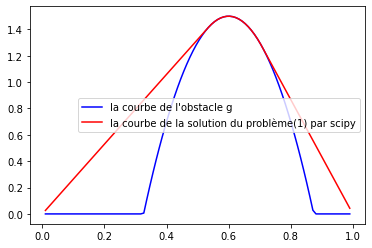

In [83]:
def minimum1(n):
    
    A = mat(n)
    x = np.linspace (0 ,1 , n + 2)
    xv = x[1:-1]
    fv , gv = f(xv) , g(xv)
    Jf = lambda u : J (u , A, fv)
    DJf = lambda u : DJ (u , A, fv)
    const = ({'type': 'ineq', 'fun' : lambda u: u - gv , 'jac' : lambda u: np.eye(np.size(u))})
    u = np.zeros(n)
    res = minimize (Jf, u, method ='SLSQP', jac=DJf, constraints =const, tol=1e-8, options ={'disp': True ,'maxiter': 5000})
    # res.x contient la solution
    fig, ax = plt.subplots()
    ax.plot(xv,gv,label="la courbe de l'obstacle g",color='b')
    ax.plot(xv,res.x,"r",label="la courbe de la solution du problème(1) par scipy")
    plt.legend()
    plt.show()
    
minimum1(100)

In [80]:
def f2(x):
    return (np.pi ** 2) * np.sin(x * np.pi)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -177.60589779152428
            Iterations: 115
            Function evaluations: 513
            Gradient evaluations: 115


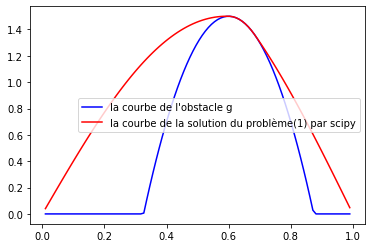

<function __main__.<lambda>(u)>

In [84]:
def minimum2(n):
    
    A = mat(n)
    x = np.linspace (0 ,1 , n + 2)
    xv = x[1:-1]
    fv , gv = f2(xv) , g(xv)
    Jf = lambda u : J (u , A, fv)
    DJf = lambda u : DJ (u , A, fv)
    const = ({'type': 'ineq', 'fun' : lambda u: u - gv , 'jac' : lambda u: np.eye(np.size(u))})
    u = np.zeros(n)
    res = minimize (Jf, u, method ='SLSQP', jac=DJf, constraints =const, tol=1e-8, options ={'disp': True ,'maxiter': 5000})
    # res.x contient la solution
    fig, ax = plt.subplots()
    ax.plot(xv,gv,label="la courbe de l'obstacle g",color='b')
    ax.plot(xv,res.x,"r",label="la courbe de la solution du problème(1) par scipy")
    plt.legend()
    plt.show()
    
minimum2(100)

In [85]:
def projK(U, gn):
    return np.maximum(U, gn)

In [110]:
def gradient_projete_fixe(Jf, DJf, gn, u0, rho, Tol, Max_iter):
    
    t0=time.time()
    k = 0
    err = Tol
    u_k = u0
    L = [u_k]
    
    while k <= Max_iter and err>=Tol :
        w_k = -DJf(u_k)
        u_i = u_k
        u_k = projK((u_k + rho * w_k), gn)
        err = np.linalg.norm(u_k - u_i)
        k += 1
        L.append(u_k)
    tf=time.time()
    duree = tf - t0
    
    return u_k, L, k, duree

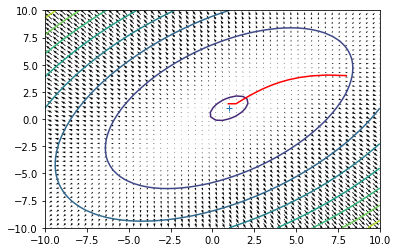

In [104]:
n=2
A = 2 * np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
b = np.ones(n)

xx = np.linspace(-10, 10, 50)
u1, u2 = np.meshgrid(xx, xx)
J = u1**2 + u2**2 - u1*u2 - (u1 + u2)

x = np.linspace (0 ,1 , n + 2)
xv = x[1:-1]
fv , gv = f(xv) , g(xv)
Jf = lambda u : J (u , A, fv)
DJf = lambda u : DJ (u , A, fv)
u0 = np.array([8.0, 4.0])
rho = 0.1
Tol = 1e-5
itermax = 1000

u_k, L, k = gradient_projete_fixe(Jf, DJf, gv, u0, rho, Tol, itermax)

x_f = [x_k[0] for x_k in L]
y_f = [x_k[1] for x_k in L]
fig = plt.figure()
ax = fig.add_subplot()
ax.contour(u1, u2, J)
v, u = np.gradient(J, 0.5, 0.5)
ax.quiver(u1, u2, u, v)
plt.plot(1, 1, '+')

plt.plot(x_f, y_f, 'r')

Nombre d'itérations:  842
Temps de calcul:  0.04210782051086426


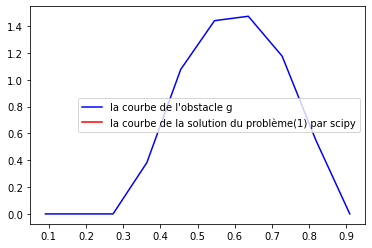

Nombre d'itérations:  331
Temps de calcul:  0.03253960609436035


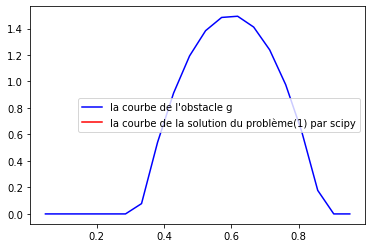

Nombre d'itérations:  182
Temps de calcul:  0.004545450210571289


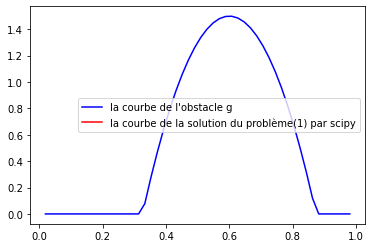

Nombre d'itérations:  136
Temps de calcul:  0.009287595748901367


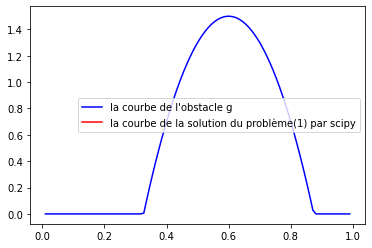

In [151]:
for n in [10,20,50,100] :
    A = mat(n)
    x = np.linspace(0 ,1 , n + 2)
    xv = x[1:-1]
    fv , gv = f(xv) , g(xv)
    Jf = lambda u : J (u , A, fv)
    DJf = lambda u : DJ (u , A, fv)
    u0 = np.ones(n)
    
    lambda1 = np.linalg.eigvals(A)[0]
    lambda2 = np.linalg.eigvals(A)[-1]
    rho = 2/(lambda1 + lambda2)
    Tol = 1e-5
    itermax = 1000

    u_k, L, k, duree = gradient_projete_fixe(Jf, DJf, gv, u0, rho, Tol, itermax)
    print("Nombre d'itérations: ", k)
    print("Temps de calcul: ", duree)
    fig, ax = plt.subplots()
    ax.plot(xv,gv,label="la courbe de l'obstacle g",color='b')
    ax.plot(xv,u_k,"r",label="la courbe de la solution du problème(1) par scipy")
    plt.legend()
    plt.show()

Nombre d'itérations:  50
Temps de calcul:  0.0023784637451171875


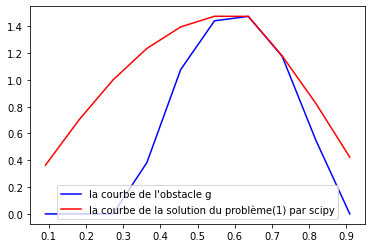

Nombre d'itérations:  218
Temps de calcul:  0.031378746032714844


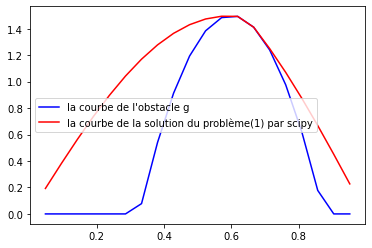

Nombre d'itérations:  1001
Temps de calcul:  0.028909683227539062


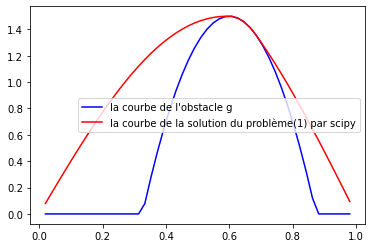

Nombre d'itérations:  1001
Temps de calcul:  0.0263063907623291


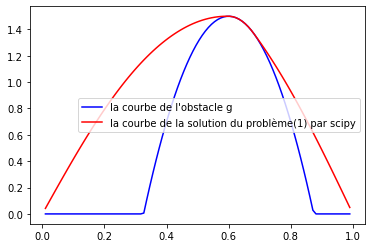

In [149]:
for n in [10,20,50,100] :
    A = mat(n)
    x = np.linspace(0 ,1 , n + 2)
    xv = x[1:-1]
    fv , gv = f2(xv) , g(xv)
    Jf = lambda u : J (u , A, fv)
    DJf = lambda u : DJ (u , A, fv)
    u0 = np.ones(n)
    
    lambda1 = np.linalg.eigvals(A)[0]
    lambda2 = np.linalg.eigvals(A)[-1]
    rho = 2/(lambda1 + lambda2)
    Tol = 1e-5
    itermax = 1000

    u_k, L, k, duree = gradient_projete_fixe(Jf, DJf, gv, u0, rho, Tol, itermax)
    print("Nombre d'itérations: ", k)
    print("Temps de calcul: ", duree)
    fig, ax = plt.subplots()
    ax.plot(xv,gv,label="la courbe de l'obstacle g",color='b')
    ax.plot(xv,u_k,"r",label="la courbe de la solution du problème(1) par scipy")
    plt.legend()
    plt.show()